### Activation Functions and Derivatives

**Leaky ReLU**
$$
f(x) =
\begin{cases}
x, & x > 0 \\
\alpha x, & x \leq 0
\end{cases}
\qquad
f'(x) =
\begin{cases}
1, & x > 0 \\
\alpha, & x \leq 0
\end{cases}
$$

**ELU (Exponential Linear Unit)**
$$
f(x) =
\begin{cases}
x, & x > 0 \\
\alpha \left(e^x - 1\right), & x \leq 0
\end{cases}
\qquad
f'(x) =
\begin{cases}
1, & x > 0 \\
\alpha e^x, & x \leq 0
\end{cases}
$$

**GELU (Gaussian Error Linear Unit)**
$$
f(x) = \frac{1}{2}x \left( 1 + \operatorname{erf}\!\left(\frac{x}{\sqrt{2}}\right) \right)
$$
$$
f'(x) = \Phi(x) + x \, \phi(x)
$$

where  
- $\Phi(x) = \frac{1}{2}\left(1 + \operatorname{erf}\!\left(\tfrac{x}{\sqrt{2}}\right)\right)$ is the standard normal CDF,  
- $\phi(x) = \frac{1}{\sqrt{2\pi}} e^{-\tfrac{x^2}{2}}$ is the standard normal PDF.


In [13]:
import numpy as np
from scipy.special import erf

x = np.array([-2, -1, 0, 1, 2], dtype=float)

def leaky_relu(x, alpha=0.01):
    return np.where(x>0, x, alpha*x)

def elu(x, alpha=1.0):
    return np.where(x>0, x, alpha * (np.exp(x)-1))

def gelu(x):
    return 0.5 * x * (1.0 + erf(x / np.sqrt(2.0)))
    

In [14]:
print(f'Leaky ReLU: {leaky_relu(x)}')
print(f'ELU: {elu(x)}')
print(f'GELU: {gelu(x)}')

Leaky ReLU: [-0.02 -0.01  0.    1.    2.  ]
ELU: [-0.86466472 -0.63212056  0.          1.          2.        ]
GELU: [-0.04550026 -0.15865525  0.          0.84134475  1.95449974]


# Visualization

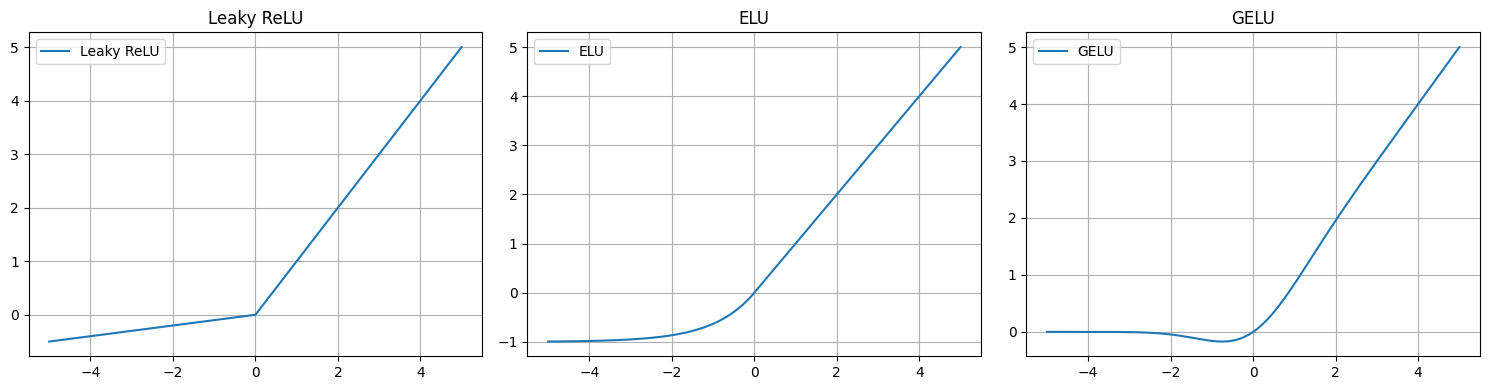

In [20]:
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 400)

plt.figure(figsize=(15, 4))

# Leaky ReLU
plt.subplot(1, 3, 1)
plt.plot(x, leaky_relu(x, 0.1), label="Leaky ReLU")
plt.title("Leaky ReLU")
plt.grid(True)
plt.legend()

# ELU
plt.subplot(1, 3, 2)
plt.plot(x, elu(x, 1.0), label="ELU")
plt.title("ELU")
plt.grid(True)
plt.legend()

# GELU
plt.subplot(1, 3, 3)
plt.plot(x, gelu(x), label="GELU")
plt.title("GELU")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Derivatives of LeakyReLU, ELU and GELU

In [17]:
def d_leaky_relu(x, alpha=0.01):
    return np.where(x > 0, 1.0, alpha)

def d_elu(x, alpha= 1.0):
    return np.where(x > 0, 1.0, alpha * np.exp(x))

def d_gelu(x):
    pdf = (1.0 / np.sqrt(2.0 * np.pi)) * np.exp(-0.5 * x**2)
    cdf = 0.5 * (1.0 + erf(x / np.sqrt(2.0)))
    return cdf + x * pdf

# Visualization

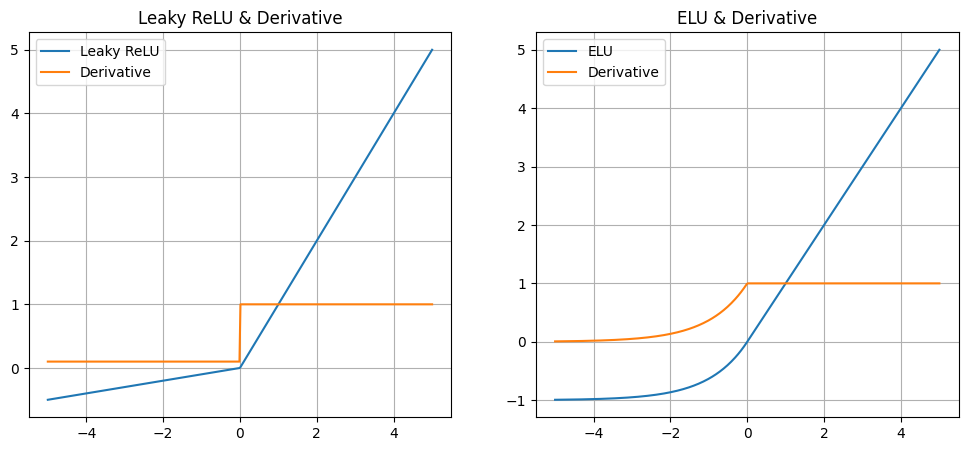

In [26]:
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 400)

# Leaky ReLU
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(x, leaky_relu(x, 0.1), label="Leaky ReLU")
plt.plot(x, d_leaky_relu(x, 0.1), label="Derivative")
plt.title("Leaky ReLU & Derivative")
plt.grid(True)
plt.legend()

# ELU
plt.subplot(1, 2, 2)
plt.plot(x, elu(x, 1.0), label="ELU")
plt.plot(x, d_elu(x, 1.0), label="Derivative")
plt.title("ELU & Derivative")
plt.grid(True)
plt.legend()

plt.show()


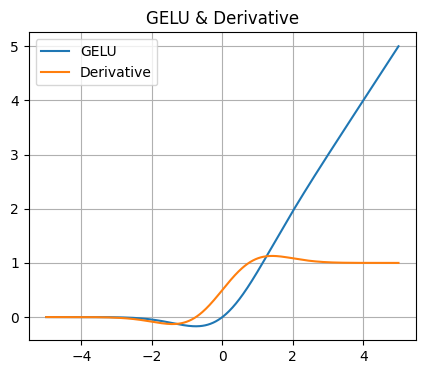

In [24]:
# GELU (separately since it has different shape)
plt.figure(figsize=(5, 4))
plt.plot(x, gelu(x), label="GELU")
plt.plot(x, d_gelu(x), label="Derivative")
plt.title("GELU & Derivative")
plt.grid(True)
plt.legend()

plt.show()

# Pytorch Version

In [27]:
import math
import torch

def leaky_relu(x, alpha=0.01):
    return torch.where(x > 0, x, alpha * x)

def d_leaky_relu(x, alpha=0.01):
    return torch.where(x > 0, torch.ones_like(x), torch.full_like(x, negative_slope))

def elu(x, alpha=1.0):
    return torch.where(x > 0, x, alpha * (torch.exp(x) - 1.0))

def d_elu(x, alpha=1.0):
    return torch.where(x > 0, torch.ones_like(x), alpha * torch.exp(x))

def gelu_exact(x):
    return 0.5 * x * (1.0 + torch.erf(x / math.sqrt(2.0)))

def d_gelu_exact(x):
    cdf = 0.5 * (1.0 + torch.erf(x / math.sqrt(2.0)))
    pdf = (1.0 / math.sqrt(2.0 * math.pi)) * torch.exp(-0.5 * x * x)
    return cdf + x * pdf